In [22]:
import numpy as np
import random
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

# LOAD DATASET

In [23]:
X_train = np.loadtxt('D:\Kuliah Online\ML Path\Image Classification CNN Keras Dataset\input.csv', delimiter=',')
Y_train = np.loadtxt('D:\Kuliah Online\ML Path\Image Classification CNN Keras Dataset\labels.csv', delimiter=',')

X_test = np.loadtxt('D:\Kuliah Online\ML Path\Image Classification CNN Keras Dataset\input_test.csv', delimiter=',')
Y_test = np.loadtxt('D:\Kuliah Online\ML Path\Image Classification CNN Keras Dataset\labels_test.csv', delimiter=',')

In [24]:
print("Shape of X_train: ", X_train.shape)
print("Shape of Y_train: ", Y_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of Y_test: ", Y_test.shape)

Shape of X_train:  (2000, 30000)
Shape of Y_train:  (2000,)
Shape of X_test:  (400, 30000)
Shape of Y_test:  (400,)


In [25]:
X_train = X_train.reshape(len(X_train),100,100,3)
Y_train = Y_train.reshape(len(Y_train),1)

X_test = X_test.reshape(len(X_test),100,100,3)
Y_test = Y_test.reshape(len(Y_test),1)

X_train = X_train/255.0
X_test = X_test/255.0

In [26]:
print("Shape of X_train: ", X_train.shape)
print("Shape of Y_train: ", Y_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of Y_test: ", Y_test.shape)

Shape of X_train:  (2000, 100, 100, 3)
Shape of Y_train:  (2000, 1)
Shape of X_test:  (400, 100, 100, 3)
Shape of Y_test:  (400, 1)


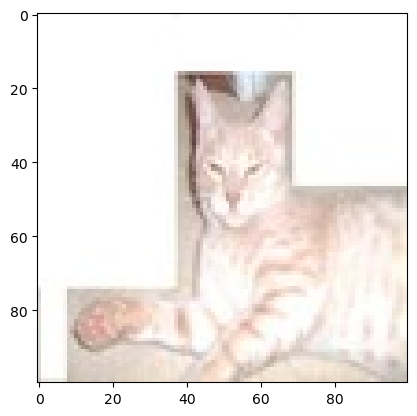

In [27]:
idx = random.randint(0, len(X_train))
plt.imshow(X_train[idx, :])
plt.show()

# MODEL

In [28]:
model = Sequential([
    Conv2D(32, (3,3), activation = 'relu', input_shape = (100, 100, 3)),
    MaxPooling2D((2,2)),
    
    Conv2D(32, (3,3), activation = 'relu'),
    MaxPooling2D((2,2)),
    
    Flatten(),
    Dense(64, activation = 'relu'),
    Dense(1, activation = 'sigmoid')
])

In [29]:
model = Sequential()

model.add(Conv2D(32, (3,3), activation = 'relu', input_shape = (100, 100, 3)))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(32, (3,3), activation = 'relu'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())
model.add(Dense(64, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

In [30]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [31]:
model.fit(X_train, Y_train, epochs = 5, batch_size = 64)

Epoch 1/5
32/32 [==============================] - 7s 183ms/step - loss: 0.7661 - accuracy: 0.5095
Epoch 2/5
32/32 [==============================] - 6s 197ms/step - loss: 0.6669 - accuracy: 0.6130
Epoch 3/5
32/32 [==============================] - 7s 207ms/step - loss: 0.5971 - accuracy: 0.6765
Epoch 4/5
32/32 [==============================] - 6s 182ms/step - loss: 0.5186 - accuracy: 0.7405
Epoch 5/5
32/32 [==============================] - 6s 197ms/step - loss: 0.4554 - accuracy: 0.7935


In [32]:
model.evaluate(X_test, Y_test)

13/13 [==============================] - 1s 51ms/step - loss: 0.6101 - accuracy: 0.6825


[0.6101215481758118, 0.6825000047683716]

# Prediction

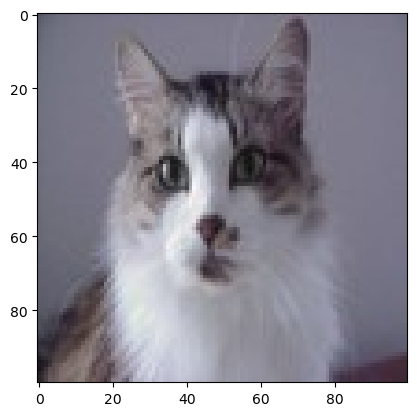

1/1 [==============================] - 0s 104ms/step
Our model says it is a : cat


In [33]:
idx2 = random.randint(0, len(Y_test))
plt.imshow(X_test[idx2, :])
plt.show()

y_pred = model.predict(X_test[idx2, :].reshape(1, 100, 100, 3))
y_pred = y_pred > 0.5

if(y_pred == 0):
    pred = 'dog'
else:
    pred = 'cat'
    
print("Our model says it is a :", pred)